# Programação Linear

## Exemplo 2.0.1.
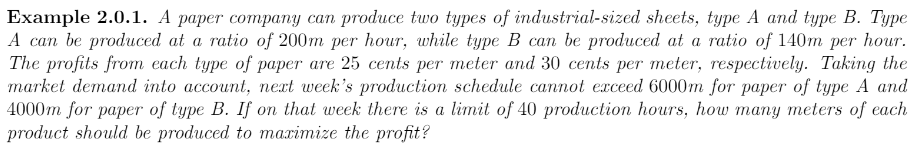

Podemos escrever as seguintes condições que modelam o problema:

$$
\begin{alignat*}{2}

\max_x &\quad& &25A + 30B
\\\\

\text{s.t}& && A/200 + B/140 \le 40
\\
&&& A \le 6000
\\
&&& B \le 4000
\\
&&& A,B \ge 0

\end{alignat*}
$$

E podemos resolver o problem usando PySCIPOpt:

In [29]:
from pyscipopt import Model

# Criar o modelo
m = Model()

# Criar variáveis
A = m.addVar("Papel A")
B = m.addVar("Papel B")

# Adicionar restrições (constraints)
m.addCons(A <= 6000)
m.addCons(B <= 4000)

m.addCons(A >= 0)
m.addCons(B >= 0)

m.addCons(A/200 + B/140 <= 40)

# Adicionar objetivo
m.setObjective(25*A + 30*B, "maximize")

# Otimizar o modelo (encontrar a solução ótima)
m.optimize()

# Obtemos todas as variáveis usando m.getVars() e depois, para cada variável i mostramos o seu nome (i.name) e o seu valor (m.getVal(i))
print([(i.name, m.getVal(i)) for i in m.getVars()])

[('Papel A', 6000.0), ('Papel B', 1400.0)]


Podemos simplificar este código adicionando à partida os valores máximos e mínimo:

In [31]:
m = Model()

# Adicionar lower bound de 0 e upper bound de acordo com a variável
A = m.addVar("Papel A", lb=0, ub=6000)
B = m.addVar("Papel B", lb=0, ub=4000)

m.addCons(A/200 + B/140 <= 40)
m.setObjective(25*A + 30*B, "maximize")
m.optimize()
print([(i.name, m.getVal(i)) for i in m.getVars()])

[('Papel A', 6000.0), ('Papel B', 1400.0)]
